## Ejemplo simple de uso de Análisis de Componentes Principales (PCA)

In [1]:
%matplotlib inline
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt

In [2]:
DATA = np.array([[10,20,10],
              [2,5,2],
              [8,17,7],
              [9,20,10],
              [12,22,11]])
print DATA

[[10 20 10]
 [ 2  5  2]
 [ 8 17  7]
 [ 9 20 10]
 [12 22 11]]


Esta matrix de datos representa 5 observaciones de 3 atributos.  O sea, 4 puntos en 3D.  Por ejemplo el primer dato es:

In [4]:
print DATA[1,:]

[2 5 2]


y todos los valores del primer atributo (llamémosle 'X'):

In [5]:
print DATA[:,0]

[10  2  8  9 12]


Ahora calculamos la matriz de covarianza:

In [6]:
np.cov?

In [7]:
DATA = np.mat(DATA)
meanVals = np.mean(DATA, axis=0)
A = DATA - meanVals
C = np.cov(A, rowvar=False)
print C

[[ 14.2   25.3   13.5 ]
 [ 25.3   46.7   24.75]
 [ 13.5   24.75  13.5 ]]


In [8]:
# Otra forma de calcularlo es: C = (1/(N-1)) A.T*A
print np.dot(A.T,A) /(np.shape(DATA)[0]-1)

[[ 14.2   25.3   13.5 ]
 [ 25.3   46.7   24.75]
 [ 13.5   24.75  13.5 ]]


Ahora calculamos los autovalores y autovectores de la matriz de covarianza:

In [11]:
np.set_printoptions(precision=2,suppress=True)

autoVal, autoVec = la.eig(C)

print "Autovalores:"
print autoVal
print
print "Autovectores:"
print autoVec

Autovalores:
[ 73.72   0.38   0.3 ]

Autovectores:
[[ 0.43  0.9  -0.04]
 [ 0.79 -0.41 -0.45]
 [ 0.42 -0.16  0.89]]


Usando los autovectores, podemos hacer una transformación del espacio de atributos original al espacio de las componentes principales.   La matriz de transformación es la matriz que tiene en las columnas los autovectores.

In [12]:
Transf = autoVec.T

DATA_pc = np.dot(Transf, A.T)

print DATA_pc.T

[[  4.17   0.     0.26]
 [-14.61   0.17   0.25]
 [ -0.35  -0.1   -0.97]
 [  3.74  -0.9    0.3 ]
 [  7.05   0.83   0.16]]


La coordenada X' de todos los puntos es:

In [9]:
DATA_pc.T[:,0]

matrix([[  4.17],
        [-14.61],
        [ -0.35],
        [  3.74],
        [  7.05]])

Sin embargo, estos autovectores no están ordenados por importancia.  Para hacer eso podemos ordenar los autovalores y quedarnos con las primeras componentes principales:

However, typically, we want a lower-dimensional space. We can sort the eigenvectors in the decreasing order of their eigenvalues and take the top k. In the example below, we'll take only the top first principal component (since it has the largest eigenvalue, no sorting necessary):

In [14]:
print autoVal
principal = np.argsort(autoVal)[::-1]
print principal

[ 73.72   0.38   0.3 ]
[0 1 2]


In [15]:
X = DATA_pc[principal[0],:]
Y = DATA_pc[principal[1],:]
print X
print Y

[[  4.17 -14.61  -0.35   3.74   7.05]]
[[ 0.    0.17 -0.1  -0.9   0.83]]


In [16]:
Ndim = 2  # Nro. de dimensiones de la proyección
DATA_redux = DATA_pc[principal[0:Ndim],:]

print DATA_redux

[[  4.17 -14.61  -0.35   3.74   7.05]
 [  0.     0.17  -0.1   -0.9    0.83]]


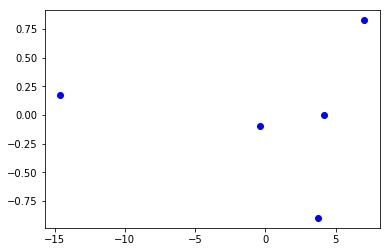

In [17]:
plt.plot(DATA_redux[0,:], DATA_redux[1,:],'ob')
plt.show()

Ahora en 3D:

In [18]:
X = DATA[:,0].T.tolist()[0]
Y = DATA[:,1].T.tolist()[0]
Z = DATA[:,2].T.tolist()[0]

Populating the interactive namespace from numpy and matplotlib


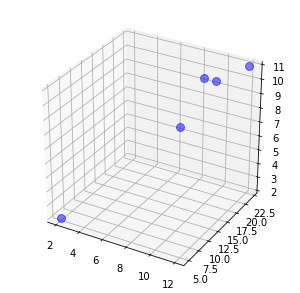

In [19]:
%pylab inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(X,Y,Z, 'o', markersize=8, color='blue', alpha=0.5)
plt.show()

Ahora interactivo!

In [20]:
import plotly
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='mlares', api_key='moDuohGxKWp0gZJI4K2i')

In [21]:
trace1 = go.Scatter3d(
    x=X,
    y=Y,
    z=Z,
    mode='markers',
    marker=dict(
        size=12,
        line=dict(
            color='rgba(217, 217, 217, 0.14)',
            width=0.5
        ),
        opacity=0.8
    )
)

In [22]:
data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)

In [24]:
fig = go.Figure(data=data, layout=layout)
plotly.plotly.iplot(fig, filename='PCA-3d-scatter')

PlotlyRequestError: 
<html><head>
<meta http-equiv="content-type" content="text/html;charset=utf-8">
<title>502 Server Error</title>
</head>
<body text=#000000 bgcolor=#ffffff>
<h1>Error: Server Error</h1>
<h2>The server encountered a temporary error and could not complete your request.<p>Please try again in 30 seconds.</h2>
<h2></h2>
</body></html>


Ahora pasamos al espacio de la PC:

In [25]:
X = DATA_pc.T[:,0].T.tolist()[0]
Y = DATA_pc.T[:,1].T.tolist()[0]
Z = DATA_pc.T[:,2].T.tolist()[0]

In [26]:
Zr = [0.]*len(Z)
Zr

[0.0, 0.0, 0.0, 0.0, 0.0]

In [27]:
trace_data = go.Scatter3d(
    x=X,
    y=Y,
    z=Z,
    mode='markers',
    marker=dict(
        size=12,
        line=dict(
            color='rgba(217, 217, 217, 0.14)',
            width=0.5
        ),
        opacity=0.8
    )
)

In [28]:
trace_proj = go.Scatter3d(
    x=X,
    y=Y,
    z=Zr,
    mode='markers',
    marker=dict(
        size=12,
        line=dict(
            color='rgba(217, 217, 217, 0.14)',
            width=0.5
        ),
        opacity=0.8
    )
)

In [29]:
data = [trace_data, trace_proj]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)

In [30]:
fig = go.Figure(data=data, layout=layout)
plotly.plotly.iplot(fig, filename='PCA-3d-scatter')

### Ahora veamos con más puntos:

In [31]:
Nsample = 300
X, Y = np.random.multivariate_normal(mean=[0., 0.], cov=[[1., 0.3],[0.7, 1.]], size=Nsample).T

def plano(x,y):
    z = 3*x - 2.*y
    return z

Z = plano(X,Y) + np.random.normal(loc=0.0, scale=1.5, size=Nsample)

/home/marce/TeachJob/Astrometria/pyramid/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning:

covariance is not positive-semidefinite.



In [32]:
trace = go.Scatter3d(
    x=X,
    y=Y,
    z=Z,
    mode='markers',
    marker=dict(
        size=2,
        line=dict(
            color='rgba(217, 217, 217, 0.14)',
            width=0.
        ),
        opacity=0.8
    )
)
data = [trace]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
plotly.plotly.iplot(fig, filename='PCA-3d-scatter')

In [33]:
DATA = np.column_stack([X,Y,Z])

In [34]:
DATA = np.mat(DATA)
meanVals = np.mean(DATA, axis=0)
A = DATA - meanVals
C = np.cov(A, rowvar=False)
print C

[[ 0.96  0.41  2.15]
 [ 0.41  0.9  -0.51]
 [ 2.15 -0.51  9.69]]


In [35]:
autoVal, autoVec = la.eig(C)
Transf = autoVec.T
DATA_pc = np.dot(Transf, A.T)

In [36]:
print autoVal
principal = np.argsort(autoVal)[::-1]
print principal

[ 10.21   0.11   1.23]
[0 2 1]


In [37]:
X = DATA_pc[principal[0],:]
Y = DATA_pc[principal[1],:]

In [38]:
X = DATA_pc.T[:,principal[0]].T.tolist()[0]
Y = DATA_pc.T[:,principal[1]].T.tolist()[0]
Z = DATA_pc.T[:,principal[2]].T.tolist()[0]

In [39]:
Zr = [0.]*len(Z)

trace_data = go.Scatter3d(
    x=X,
    y=Y,
    z=Z,
    mode='markers',
    marker=dict(
        size=3,
        line=dict(
            color='rgba(217, 217, 217, 0.14)',
            width=0.0
        ),
        opacity=0.8
    )
)

trace_proj = go.Scatter3d(
    x=X,
    y=Y,
    z=Zr,
    mode='markers',
    marker=dict(
        size=5,
        line=dict(
            color='rgba(217, 217, 217, 0.14)',
            width=0.0
        ),
        opacity=1.
    )
)

data = [trace_data, trace_proj]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)

fig = go.Figure(data=data, layout=layout)
plotly.plotly.iplot(fig, filename='PCA-3d-scatter')

Veamos entonces la proyección en el subespacio de las primeras dos componentes principales

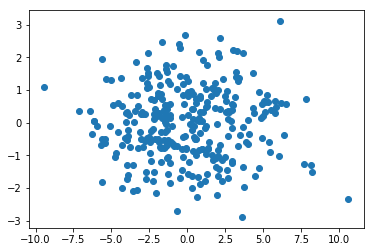

In [40]:
plt.scatter(X,Y)
plt.show()

We can also use Scikit-learn decomposition module to do the same thing:

In [51]:
from sklearn import decomposition

In [52]:
pca = decomposition.PCA()
XTrans2 = pca.fit_transform(X)

print XTrans2

[[ -4.17   0.     0.26]
 [ 14.61   0.17   0.25]
 [  0.35  -0.1   -0.97]
 [ -3.74  -0.9    0.3 ]
 [ -7.05   0.83   0.16]]


The remaining part of this notebook, is another example of using PCA for dimensionality reduction:

In [53]:
M = np.array([[2.5, 2.4],
           [0.5, 0.7],
           [2.2, 2.9],
           [1.9, 2.2],
           [3.1, 3.0],
           [2.3, 2.7],
           [2, 1.6],
           [1, 1.1],
           [1.5, 1.6],
           [1.1, 0.9]])

meanM = np.mean(M, axis=0)
MC = M - meanM             # MC is the zero-mean (centered) version of X
CovM = np.cov(MC, rowvar=0)    # CovM is the covarianvce matrix of M
print "Zero Mean Matrix:\n", MC,"\n"
print "Covariance Matrix:\n", CovM,"\n"

Zero Mean Matrix:
[[ 0.69  0.49]
 [-1.31 -1.21]
 [ 0.39  0.99]
 [ 0.09  0.29]
 [ 1.29  1.09]
 [ 0.49  0.79]
 [ 0.19 -0.31]
 [-0.81 -0.81]
 [-0.31 -0.31]
 [-0.71 -1.01]] 

Covariance Matrix:
[[ 0.62  0.62]
 [ 0.62  0.72]] 



In [54]:
eigVals, eigVecs = la.eig(CovM)

print "Eigenvalues:\n", eigVals,"\n"
print "Eigenvectors:\n", eigVecs,"\n"

Eigenvalues:
[ 0.05  1.28] 

Eigenvectors:
[[-0.74 -0.68]
 [ 0.68 -0.74]] 



In [55]:
newFeatures = eigVecs[:,1].T
MTrans = np.dot(newFeatures, MC.T)

print np.mat(MTrans).T

[[-0.83]
 [ 1.78]
 [-0.99]
 [-0.27]
 [-1.68]
 [-0.91]
 [ 0.1 ]
 [ 1.14]
 [ 0.44]
 [ 1.22]]


In [56]:
pca2 = decomposition.PCA(n_components=1)
MTrans2 = pca2.fit_transform(M)
print MTrans2

[[-0.83]
 [ 1.78]
 [-0.99]
 [-0.27]
 [-1.68]
 [-0.91]
 [ 0.1 ]
 [ 1.14]
 [ 0.44]
 [ 1.22]]
